In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Import Dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/TelcoChurn_prep_new.csv")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Gender Female,Gender Male,Not a SeniorCitizen,Is SeniorCitizen,Not Have Partner,Have Partner,Not Have Dependets,Have Dependents,Not Have PhoneService,Have PhoneService,Not Have MultipleLines,Not have phone service,Have MultipleLines,Using DSL as InternetService,Using Fiber optic as InternetService,Not have InternetService,Not Have OnlineSecurity,Not have internet service(OnlineSecurity),Have OnlineSecurity,Not Have OnlineBackup,Not have internet service(OnlineBackup),Have OnlineBackup,Not Have DeviceProtection,Not Have internet service(DeviceProtection),Have DeviceProtection,Not have TechSupport,Not Have internet service(TechSupport),Have TechSupport,Not have StreamingTV,Not Have internet service(StreamingTV),Have StreamingTV,Not have StreamingMovies,Not Have internet service(StreamingMovies),Have StreamingMovies,Month-to-month,One year,Two year,Not Using PaperlessBilling,Using PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,No,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,No,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,Yes,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0.512486,-0.747850,-0.195248,No,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,-1.239504,0.196178,-0.940457,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,-0.343137,0.664868,-0.129180,No,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7028,2234-XADUH,1.612573,1.276493,2.241056,No,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7029,4801-JZAZL,-0.872808,-1.170004,-0.854514,No,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7030,8361-LTMKD,-1.158016,0.319168,-0.872095,Yes,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


# Feature selection

pada model random forest pertama, saya menggunakan feature selection dengan pendekatan filter-based approach yang memiliki kelemahan fatal yaitu penerapan asumsi independensi

kali ini saya akan menggunakan pendekatan wrapped-based approach

kali ini saya akan menggunakan teknik Recursive Feature Elimination (RFE)

## cek Recursive Feature Elimination (RFE)

In [ ]:
df.drop("customerID", axis=1, inplace=True)

In [ ]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
rfe = RFE(model, n_features_to_select=15)

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
fit = rfe.fit(X, y)

In [ ]:
selected_features = X.columns[fit.support_]
X_selected = X[selected_features]

In [ ]:
X_selected.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Gender Male',
       'Not a SeniorCitizen', 'Have Partner', 'Not Have MultipleLines',
       'Using Fiber optic as InternetService', 'Not Have OnlineSecurity',
       'Not Have OnlineBackup', 'Not Have DeviceProtection',
       'Not have TechSupport', 'Month-to-month', 'Not Using PaperlessBilling',
       'Electronic check'],
      dtype='object')

## cek Mutual Information(MI)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
mi = SelectKBest(mutual_info_classif, k="all")

In [ ]:
mi.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7faf6969e5f0>)

In [ ]:
feature_mi_score = pd.Series(mi.scores_, index=X.columns)

In [ ]:
feature_mi_score.sort_values(ascending=False)[['tenure', 'MonthlyCharges', 'TotalCharges', 'Gender Male',
       'Not a SeniorCitizen', 'Have Partner', 'Not Have MultipleLines',
       'Using Fiber optic as InternetService', 'Not Have OnlineSecurity',
       'Not Have OnlineBackup', 'Not Have DeviceProtection',
       'Not have TechSupport', 'Month-to-month', 'Not Using PaperlessBilling',
       'Electronic check']]

tenure                                  0.072967
MonthlyCharges                          0.042721
TotalCharges                            0.043942
Gender Male                             0.000000
Not a SeniorCitizen                     0.014808
Have Partner                            0.010796
Not Have MultipleLines                  0.011482
Using Fiber optic as InternetService    0.050045
Not Have OnlineSecurity                 0.052127
Not Have OnlineBackup                   0.035147
Not Have DeviceProtection               0.034826
Not have TechSupport                    0.064614
Month-to-month                          0.088542
Not Using PaperlessBilling              0.014378
Electronic check                        0.049524
dtype: float64

Meskipun berbeda dengan MI, tapi mari kita cek modeling dengan hasil dari Recursive Feature Elimination (RFE)

## membuat hasil dari Recursive Feature Elimination (RFE) menjadi dataset

In [ ]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)

In [ ]:
X_selected

,tenure,MonthlyCharges,TotalCharges,Gender Male,Not a SeniorCitizen,Have Partner,Not Have MultipleLines,Using Fiber optic as InternetService,Not Have OnlineSecurity,Not Have OnlineBackup,Not Have DeviceProtection,Not have TechSupport,Month-to-month,Not Using PaperlessBilling,Electronic check
0,-1.280248,-1.161694,-0.994194,0,1,1,0,0,1,0,1,1,1,0,1
1,0.064303,-0.260878,-0.173740,1,1,0,1,0,0,1,0,1,0,1,0
2,-1.239504,-0.363923,-0.959649,1,1,0,1,0,0,0,1,1,1,0,0
3,0.512486,-0.747850,-0.195248,1,1,0,0,0,0,1,0,0,0,1,0
4,-1.239504,0.196178,-0.940457,0,1,0,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,1,1,1,0,0,0,1,0,0,0,0,0
7028,1.612573,1.276493,2.241056,0,1,1,0,1,1,0,0,1,0,0,0
7029,-0.872808,-1.170004,-0.854514,0,1,1,0,0,0,1,1,1,1,0,1
7030,-1.158016,0.319168,-0.872095,1,0,1,0,1,1,1,1,1,1,0,0


# Dimenctional reduction

meskipun asumsi distribusi normal tidak terpenuhi, mari kita cek apakah dengan LDA akan meningkatkan hasil model daripada model random forest pertama

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=1)

In [ ]:
X = X_selected
y = df["Churn"]

In [ ]:
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=1)

In [ ]:
X_lda = lda.transform(X_selected)

In [ ]:
X_lda.shape

(7032, 1)

In [ ]:
df_lda = pd.DataFrame(X_lda, columns=['LD'])

In [ ]:
df_lda

,LD
0,0.978856
1,-0.917302
2,0.286676
3,-1.132339
4,1.887022
...,...
7027,-0.364119
7028,-0.731280
7029,0.645008
7030,1.929899


# Modeling

## Baseline model

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
X = df_lda
y = df["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7277896233120114
Precision: 0.4881889763779528
Recall: 0.49732620320855614
F1-score: 0.49271523178807947
Confusion matriks: 
 [[838 195]
 [188 186]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



In [ ]:
from sklearn.metrics import roc_curve, auc

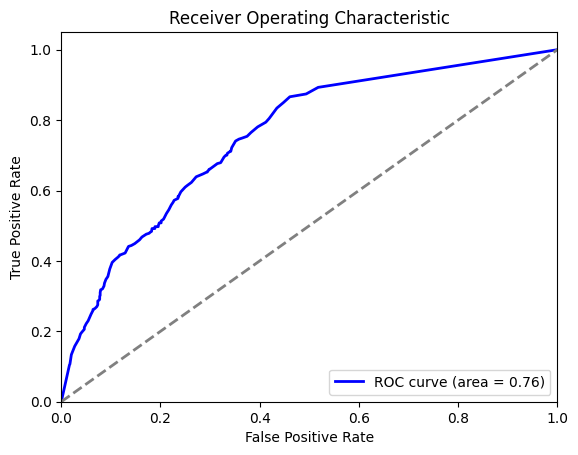

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve, StratifiedKFold

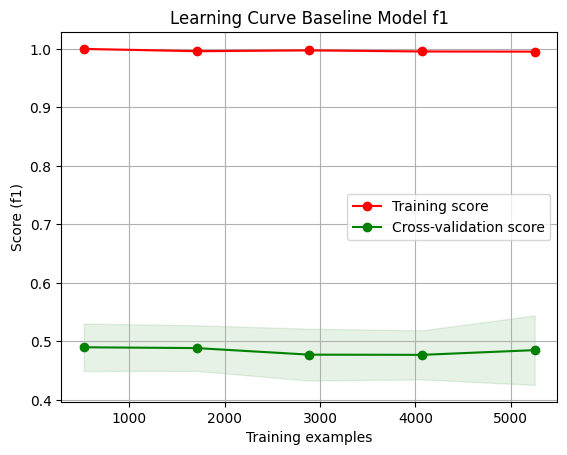

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

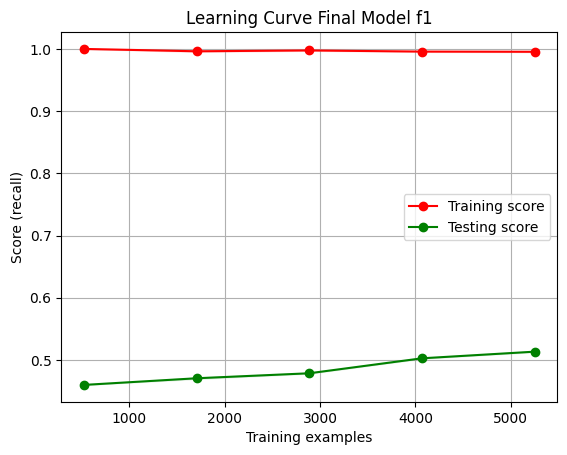

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [ ]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

f1 test: 0.5039370078740159
f1 train: 0.9640094180961991


overfitting untuk baseline model

## Model Performance Curves

### max_depth

In [ ]:
from sklearn.model_selection import cross_val_score

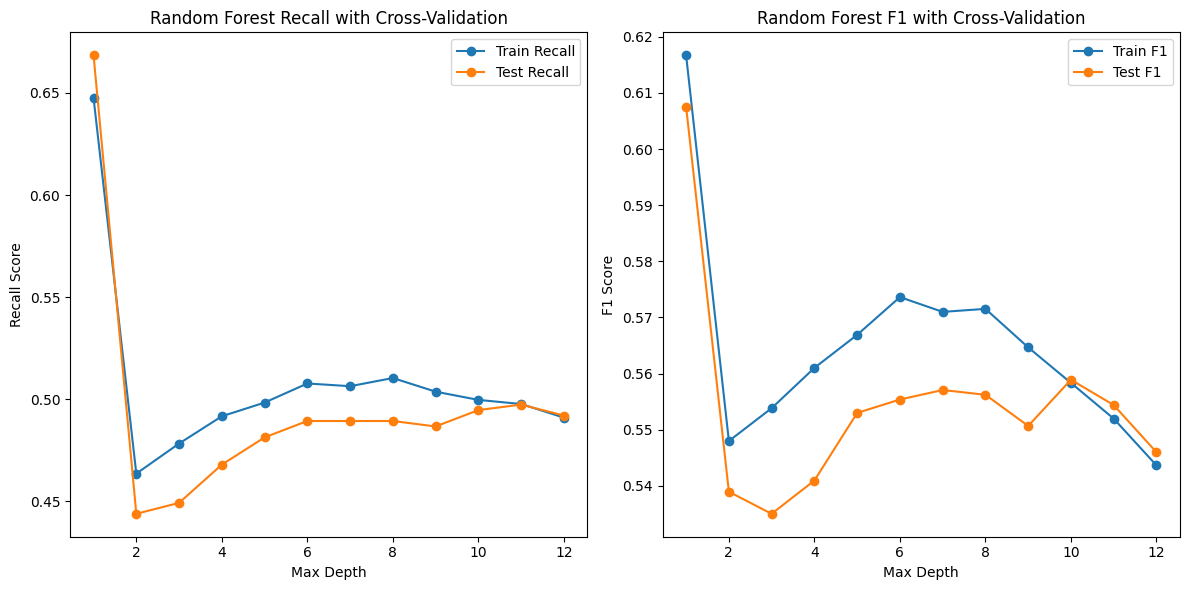

In [ ]:
values = [i for i in range(1, 13)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(max_depth=i, random_state=42, n_jobs=-1)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("Max Depth")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

### min_samples_split

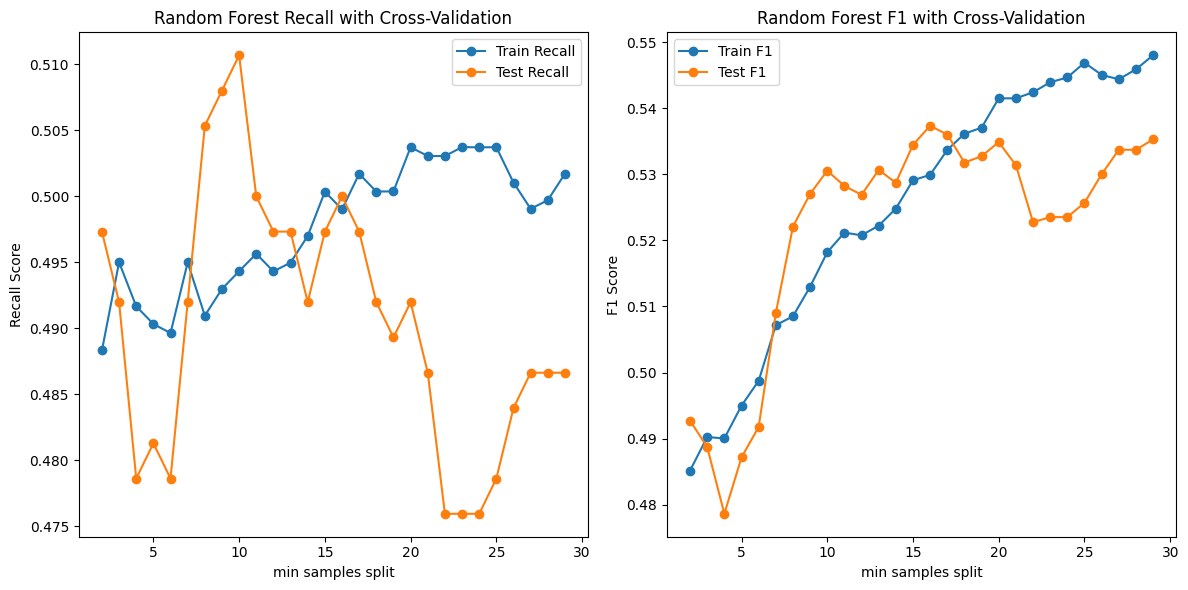

In [ ]:
values = [i for i in range(2, 30)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_split=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples split")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples split")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

Pada grafik F1 score, nilai min_samples_split di sekitar 10 hingga 15 memberikan keseimbangan yang baik antara train dan test F1 score, dengan nilai test F1 yang cukup tinggi dan mendekati nilai train F1.

Nilai min_samples_split di atas 20 menunjukkan penurunan yang signifikan pada test F1 score, menunjukkan bahwa nilai yang lebih tinggi cenderung menyebabkan underfitting.

### min_samples_leaf

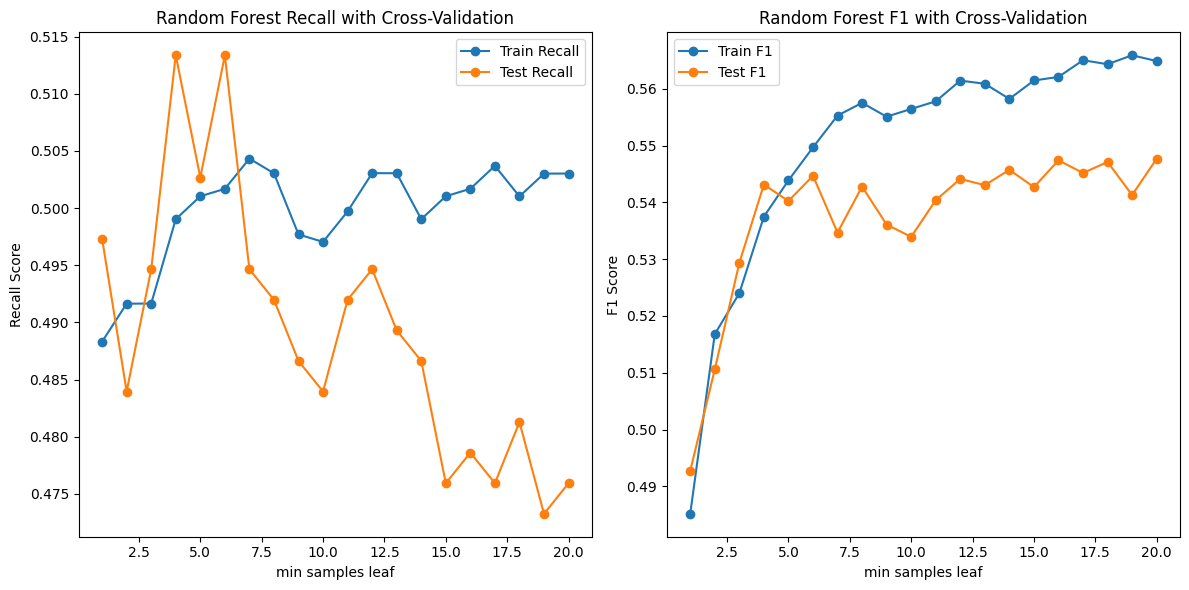

In [ ]:
values = [i for i in range(1, 21)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_leaf=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples leaf")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples leaf")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

## hyperparameter tunning

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1],
    'min_samples_split': [10,15,20],
    'min_samples_leaf': [7],
    'bootstrap': [True, False]
}

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [7],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='f1')

In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 1, 'bootstrap': False}


# Hyperparameter tunning lagi

nilai min_samples_split pada 10,15,dan 20 ..Test F1 score mendekati train F1 score, yang menunjukkan keseimbangan yang baik antara performa pada data pelatihan dan pengujian.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1],
    'min_samples_split': [10],
    'min_samples_leaf': [19],
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1)

In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=1,
                                                    min_samples_leaf=4,
                                                    min_samples_split=15,
                                                    n_estimators=300,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [19],
                                        'min_samples_split': [10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='f1')

In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': 'sqrt', 'max_depth': 1, 'bootstrap': False}


## Evaluasi model

In [ ]:
rf = RandomForestClassifier(
    bootstrap = False,
    random_state=42,
    max_depth = 1,
    max_features = "sqrt",
    min_samples_leaf = 19,
    min_samples_split = 10,
    n_estimators = 100)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=1, min_samples_leaf=19,
                       min_samples_split=10, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7455579246624022
Precision: 0.5147058823529411
Recall: 0.7486631016042781
F1-score: 0.6100217864923748
Confusion matriks: 
 [[769 264]
 [ 94 280]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.75      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



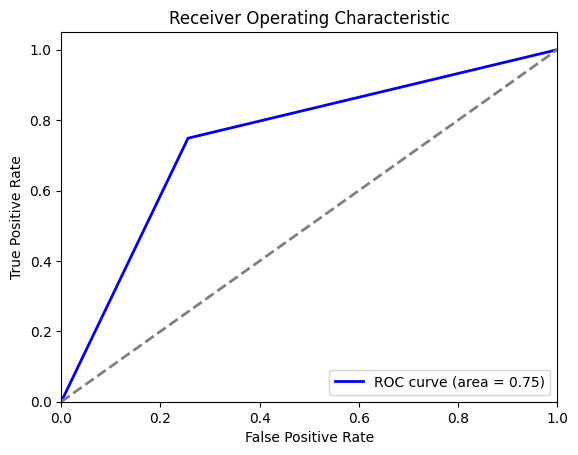

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

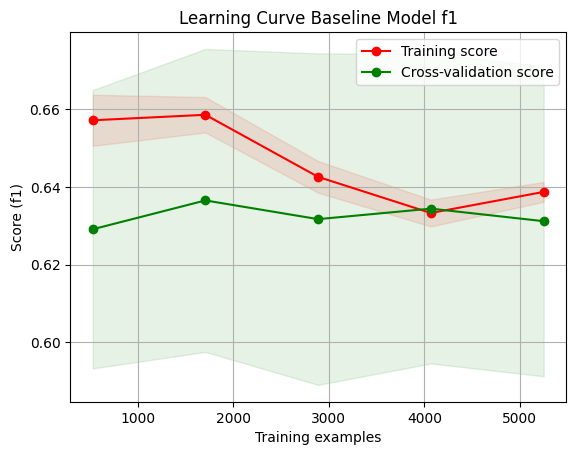

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

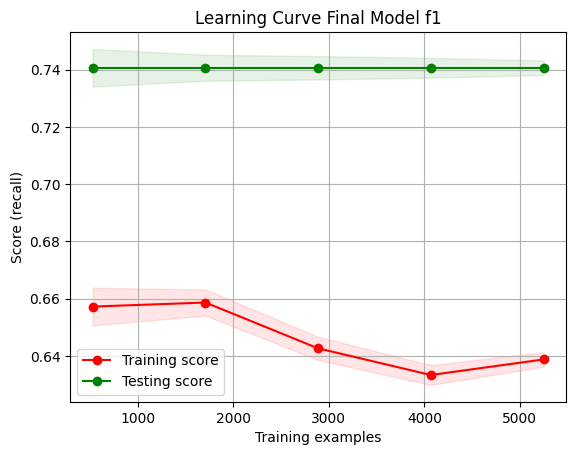

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [ ]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

f1 test: 0.606790799561884
f1 train: 0.6384401114206127


## Evaluasi model hyperparameter tunning dengan bootstrap = true




In [ ]:
rf = RandomForestClassifier(
    bootstrap = True,
    random_state=42,
    max_depth = 1,
    max_features = "sqrt",
    min_samples_leaf = 7,
    min_samples_split = 10,
    n_estimators = 500)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=10,
                       n_estimators=500, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7860696517412935
Precision: 0.5919395465994962
Recall: 0.6283422459893048
F1-score: 0.609597924773022
Confusion matriks: 
 [[871 162]
 [139 235]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.59      0.63      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.79      0.79      0.79      1407



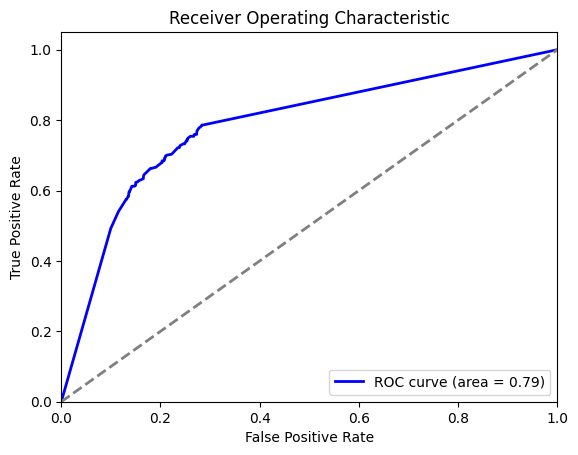

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

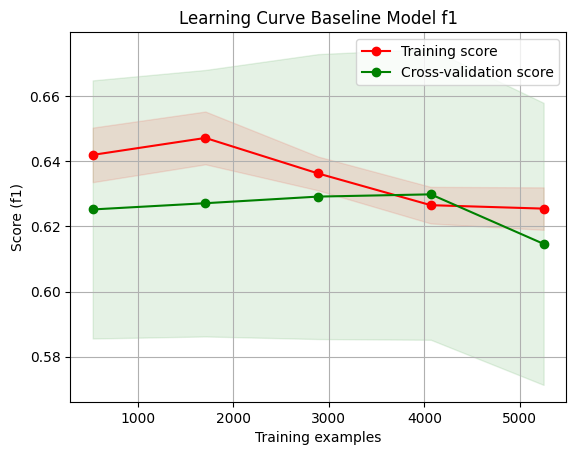

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

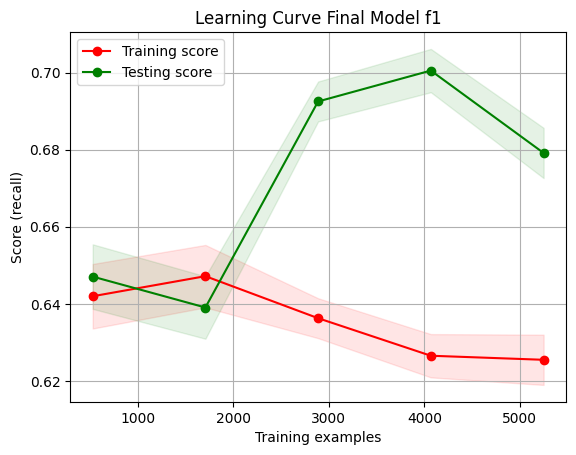

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

- Skor pelatihan cenderung menurun seiring dengan bertambahnya jumlah contoh pelatihan, yang mengindikasikan bahwa model semakin sulit untuk sepenuhnya cocok dengan data pelatihan saat jumlah data pelatihan bertambah. Hal ini wajar karena semakin banyak data pelatihan yang ditambahkan, semakin banyak variasi dalam data, dan model harus belajar lebih banyak pola.

- Skor pengujian awalnya meningkat seiring dengan bertambahnya contoh pelatihan, mencapai puncaknya di sekitar 3000 contoh pelatihan, kemudian cenderung menurun namun tetap lebih tinggi daripada skor pelatihan.

1. Jika model mengalami underfitting, maka baik skor pelatihan maupun skor pengujian akan rendah. Ini mengindikasikan bahwa model terlalu sederhana untuk menangkap pola yang ada dalam data. Pada grafik ini, skor pelatihan mulai dari 0.64 dan sedikit menurun seiring bertambahnya data, menunjukkan bahwa model memiliki performa yang cukup stabil di data pelatihan.

2. Jika model mengalami overfitting, skor pelatihan akan tinggi sementara skor pengujian akan rendah. Pada grafik ini, meskipun skor pengujian mulai menurun setelah mencapai puncaknya, tetap saja lebih tinggi daripada skor pelatihan, menunjukkan bahwa model tidak terlalu cocok dengan data pelatihan tetapi masih dapat menangkap pola dalam data pengujian dengan baik.

**Kesimpulan:**
- Grafik ini menunjukkan indikasi underfitting yang ringan, karena model tidak mampu mencapai skor pelatihan yang tinggi, dan ada penurunan performa di skor pengujian setelah jumlah data pelatihan tertentu

In [ ]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

f1 test: 0.6062052505966586
f1 train: 0.6297662976629766
